The goal of this exercise is to create an aggregate growth metrics for Bitcoin.

There are many growth metrics available from Coinmetrics already, but they don't comprehensively measure how fast a network is growing.

In this analysis, we will look into the metrics that we could use.

In [1]:
# we import the libraries that will be needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
from statsmodels.tsa.seasonal import seasonal_decompose

# 1. Which network metrics should be used as inputs into the aggregate growth metric?

Data dictionary: https://coinmetrics.io/community-data-dictionary/

In [2]:
# first, we just take a look at the data that we will be using
btc_df = pd.read_csv('btc.csv')

btc_df.describe()

,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,CapMVRVCur,CapMrktCurUSD,CapRealUSD,DiffMean,FeeMeanNtv,FeeMeanUSD,...,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,VtyDayRet180d,VtyDayRet30d,VtyDayRet60d
count,3.971000e+03,3971.000000,3.971000e+03,3.965000e+03,3410.000000,3.410000e+03,3.971000e+03,3.965000e+03,3713.000000,3410.000000,...,3.410000e+03,3713.000000,3410.000000,3.713000e+03,3.410000e+03,3.971000e+03,3.410000e+03,3230.000000,3380.000000,3350.000000
mean,2.920967e+05,152.173004,6.288627e+07,4.180789e+05,2.078684,3.553913e+10,1.858635e+10,1.244270e+12,0.000995,1.003661,...,6.468043e+08,105.221227,3648.139662,6.067608e+01,3.145107e+01,1.094682e+06,2.168220e+09,0.049788,0.044986,0.046991
std,3.034371e+05,36.589699,6.153363e+07,4.122851e+05,3.174040,5.927366e+10,3.290832e+10,2.725090e+12,0.008146,3.835360,...,1.172422e+09,712.682767,5563.303575,6.739568e+02,5.060529e+01,2.003768e+06,4.422641e+09,0.022017,0.030323,0.027426
min,0.000000e+00,0.000000,0.000000e+00,2.150000e+02,0.386829,1.776705e+05,0.000000e+00,1.000000e+00,0.000000,0.000000,...,4.647065e+02,0.010000,0.762873,1.000000e-08,8.203471e-08,0.000000e+00,5.874592e+02,0.020298,0.007481,0.010406
25%,1.422050e+04,138.000000,2.774092e+06,1.915470e+04,1.196228,1.285933e+08,4.212391e+07,1.307728e+06,0.000144,0.019327,...,4.892959e+06,2.061618,414.703513,1.502400e-02,2.907430e+00,3.294855e+05,2.913089e+07,0.032778,0.024582,0.028838
50%,1.762840e+05,152.000000,3.874152e+07,2.394111e+05,1.697880,5.765725e+09,4.106260e+09,1.175655e+10,0.000246,0.088706,...,9.570577e+07,4.053891,1396.516340,3.186366e-02,1.143878e+01,7.198488e+05,3.286655e+08,0.042596,0.036842,0.039831
75%,5.741875e+05,167.000000,1.214944e+08,8.248473e+05,2.343061,4.436285e+10,7.965448e+09,4.407799e+11,0.000726,0.490653,...,8.987899e+08,25.962424,4740.530001,2.100000e-01,5.149581e+01,1.353404e+06,2.741419e+09,0.061008,0.054679,0.059274
max,1.290363e+06,692.000000,2.186042e+08,1.297198e+06,146.038332,3.288988e+11,1.030089e+11,1.369148e+13,0.220000,56.308124,...,1.082210e+10,22175.000000,51124.770624,2.217500e+04,5.348536e+02,6.725965e+07,4.877049e+10,0.109532,0.191722,0.143269


/Users/ninakuklisova/miniconda2/envs/jupi_modern/lib/python2.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


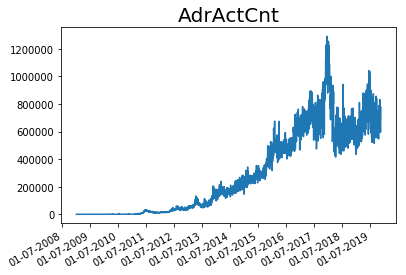

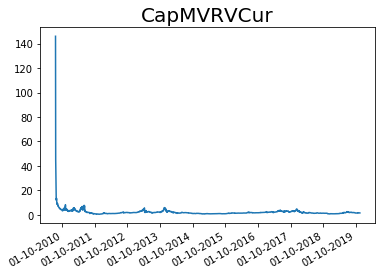

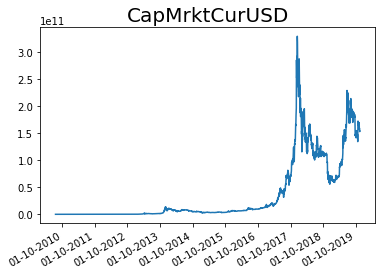

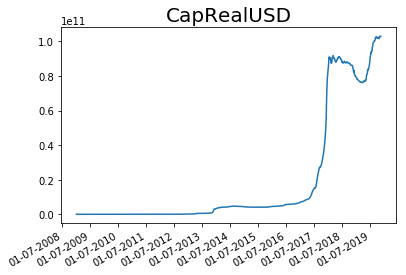

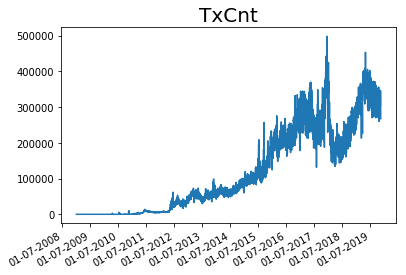

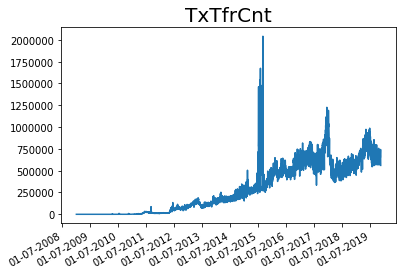

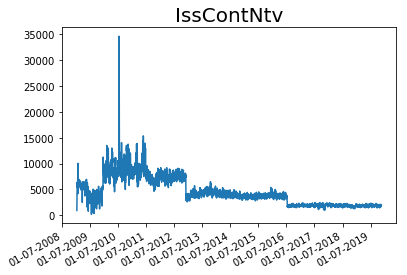

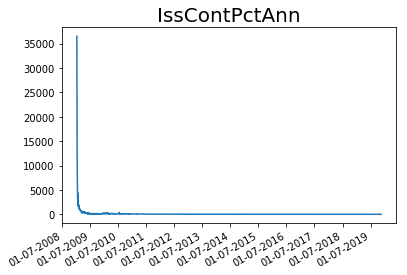

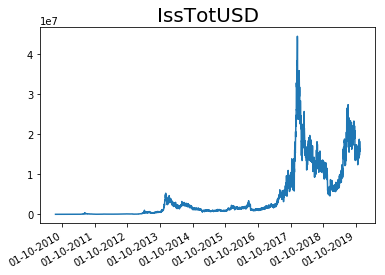

In [3]:
# let's see how do these candidate metrics evolve over time

# set the date column to be the date
btc_df['date'] = pd.to_datetime(btc_df['date'])
btc_df = btc_df.set_index('date')

candidate_metrics = ['AdrActCnt', 'CapMVRVCur', 'CapMrktCurUSD', 'CapRealUSD', 'TxCnt', 'TxTfrCnt', 'IssContNtv', 'IssContPctAnn', 'IssTotUSD']

for metric in candidate_metrics:

    subset_df = btc_df[[metric]]

    #subset_df.plot()

    #plt.show()

    # Plot
    plt.figure()
    plt.plot(subset_df)
    ax = plt.gca()
    ax.set_title(metric, fontsize=20)
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=12))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
    plt.gcf().autofmt_xdate() # Rotation
    plt.show()

As we can seem not all of the metrics are available all the way back to January 3rd, 2009.
However, for all metrics except for CapMVRVCur, we can assume all values prior to the first measured value to be 0.

What we are looking for is a metric that would describe the bitcoin market in the same way as the GDP describes the US economy.

Quoting the definition on St. Louis Fed's site:
"Gross domestic product (GDP) is the value of the goods and services produced by the nation's economy less the value of the goods and services used up in production. GDP is also equal to the sum of personal consumption expenditures, gross private domestic investment, net exports of goods and services, and government consumption expenditures and gross investment. Real values are inflation-adjusted estimates—that is, estimates that exclude the effects of price changes."

So, we will be looking for metrics that describe this market in a similar way.

Based on the data dictionary, these are the metrics that are the closest equivalents in the bitcoin space:

value of the goods and services produced by the nation's economy ~ CapMrktCurUSD;

value of the goods and services used up in production ~ FeeTotUSD

Metrics such as :
personal consumption expenditures, gross private domestic investment, net exports of goods and services, government consumption expenditures, gross investment, may require a little further analysis.

So, let's try taking a look at how this simplified bitcoin economy would look with a growth measured this way.

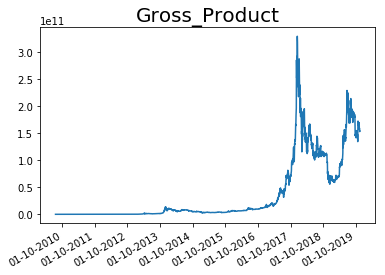

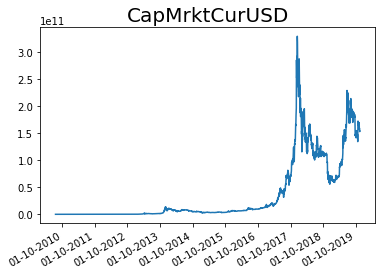

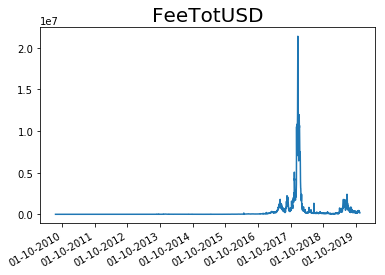

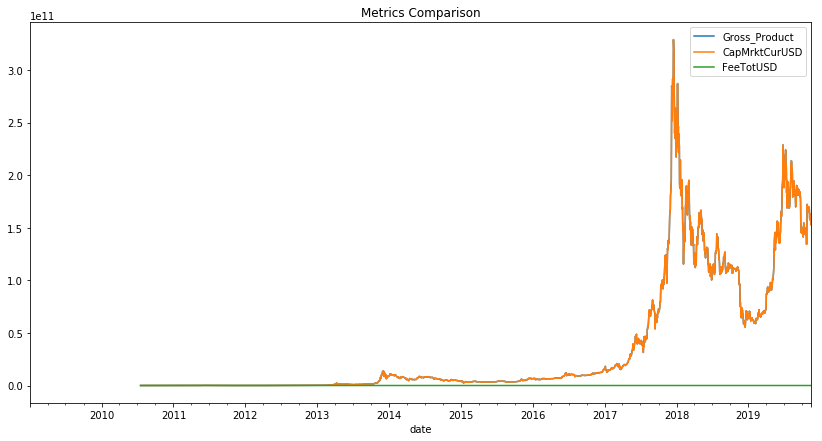

In [4]:
btc_df['Gross_Product'] = btc_df['CapMrktCurUSD'] - btc_df['FeeTotUSD']

desc_metrics = ['Gross_Product', 'CapMrktCurUSD', 'FeeTotUSD']

for met in desc_metrics:
    subset_df = btc_df[[met]]
    plt.figure()
    plt.plot(subset_df)
    ax = plt.gca()
    ax.set_title(met, fontsize=20)
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=12))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
    plt.gcf().autofmt_xdate() # Rotation
    plt.show()
    
    
subset_df = btc_df[['Gross_Product', 'CapMrktCurUSD', 'FeeTotUSD']]

subset_df.plot(figsize=(14,7), title = 'Metrics Comparison')
plt.show()

As this graph shows, the Gross product of the bitcoin market calculated this way is very close to the CapMrktCurUSD value, because the total fees paid to miners are much lower than the capital of the bitcoin market.


# 2. How to remove seasonality in the time series?

Some network metrics like TxCnt exhibit a lot of noise and some seasonal patterns. How to reduce the impact of noise and seasonality and amplify the signal in these metrics?

One common way to de-seasonalize a time series is to difference it. This shows us how did the given metric change over the period of 1 year (assuming that period is relevant for this case).
For example, very often, traders are more enthousiastic on January first, less active around certain holidays, etc.
So, we can try it on this time series as well.

In [5]:
btc_df['date'] = btc_df.index
btc_df.describe()

,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,CapMVRVCur,CapMrktCurUSD,CapRealUSD,DiffMean,FeeMeanNtv,FeeMeanUSD,...,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,VtyDayRet180d,VtyDayRet30d,VtyDayRet60d,Gross_Product
count,3.971000e+03,3971.000000,3.971000e+03,3.965000e+03,3410.000000,3.410000e+03,3.971000e+03,3.965000e+03,3713.000000,3410.000000,...,3713.000000,3410.000000,3.713000e+03,3.410000e+03,3.971000e+03,3.410000e+03,3230.000000,3380.000000,3350.000000,3.410000e+03
mean,2.920967e+05,152.173004,6.288627e+07,4.180789e+05,2.078684,3.553913e+10,1.858635e+10,1.244270e+12,0.000995,1.003661,...,105.221227,3648.139662,6.067608e+01,3.145107e+01,1.094682e+06,2.168220e+09,0.049788,0.044986,0.046991,3.553884e+10
std,3.034371e+05,36.589699,6.153363e+07,4.122851e+05,3.174040,5.927366e+10,3.290832e+10,2.725090e+12,0.008146,3.835360,...,712.682767,5563.303575,6.739568e+02,5.060529e+01,2.003768e+06,4.422641e+09,0.022017,0.030323,0.027426,5.927295e+10
min,0.000000e+00,0.000000,0.000000e+00,2.150000e+02,0.386829,1.776705e+05,0.000000e+00,1.000000e+00,0.000000,0.000000,...,0.010000,0.762873,1.000000e-08,8.203471e-08,0.000000e+00,5.874592e+02,0.020298,0.007481,0.010406,1.776703e+05
25%,1.422050e+04,138.000000,2.774092e+06,1.915470e+04,1.196228,1.285933e+08,4.212391e+07,1.307728e+06,0.000144,0.019327,...,2.061618,414.703513,1.502400e-02,2.907430e+00,3.294855e+05,2.913089e+07,0.032778,0.024582,0.028838,1.285930e+08
50%,1.762840e+05,152.000000,3.874152e+07,2.394111e+05,1.697880,5.765725e+09,4.106260e+09,1.175655e+10,0.000246,0.088706,...,4.053891,1396.516340,3.186366e-02,1.143878e+01,7.198488e+05,3.286655e+08,0.042596,0.036842,0.039831,5.765713e+09
75%,5.741875e+05,167.000000,1.214944e+08,8.248473e+05,2.343061,4.436285e+10,7.965448e+09,4.407799e+11,0.000726,0.490653,...,25.962424,4740.530001,2.100000e-01,5.149581e+01,1.353404e+06,2.741419e+09,0.061008,0.054679,0.059274,4.436179e+10
max,1.290363e+06,692.000000,2.186042e+08,1.297198e+06,146.038332,3.288988e+11,1.030089e+11,1.369148e+13,0.220000,56.308124,...,22175.000000,51124.770624,2.217500e+04,5.348536e+02,6.725965e+07,4.877049e+10,0.109532,0.191722,0.143269,3.288883e+11


In [6]:
#tx_cnt_df = btc_df[['TxCnt' ]]

tx_cnt_df = btc_df[['date','TxCnt']]

# this wouldn't have taken into account leap years.
# we need to drop February 29th of leap years
tx_cnt_df = tx_cnt_df[tx_cnt_df['date'] != dt.date(year=2016,month=2,day=29)]
tx_cnt_df = tx_cnt_df[tx_cnt_df['date'] != dt.date(year=2012,month=2,day=29)]
tx_cnt_df = tx_cnt_df[tx_cnt_df['date'] != dt.date(year=2008,month=2,day=29)]


tx_cnt_df.describe()

-c:7: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
-c:8: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
-c:9: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.


,TxCnt
count,3969.000000
mean,119614.913076
std,119396.687323
min,0.000000
25%,6092.000000
50%,68176.000000
75%,224662.000000
max,498142.000000


In [7]:
print(tx_cnt_df.head())

                 date  TxCnt
date                        
2009-01-03 2009-01-03      0
2009-01-04 2009-01-04      0
2009-01-05 2009-01-05      0
2009-01-06 2009-01-06      0
2009-01-07 2009-01-07      0


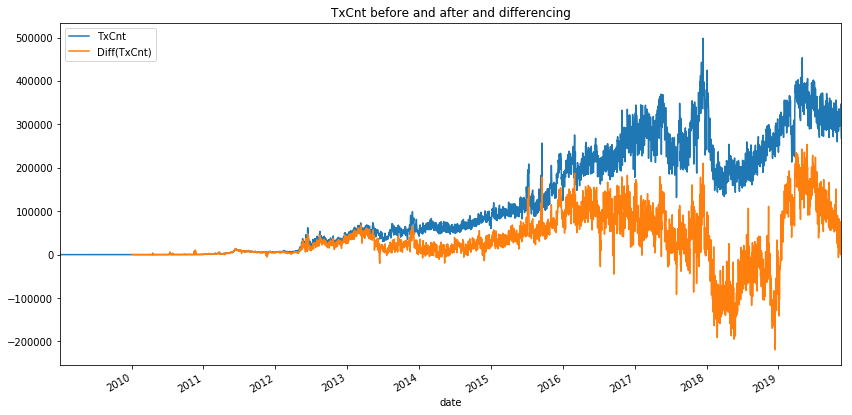

In [8]:
tx_cnt_df['Diff(TxCnt)'] = tx_cnt_df['TxCnt'].diff(periods = 365)


tx_cnt_df[['TxCnt', 'Diff(TxCnt)']].plot(figsize=(14,7), title = 'TxCnt before and after and differencing')
plt.show()

Here, the blue line shows the number of transactions per day on the given date; the orange one shows the number of transactions per day on the given date compared to the same day of the year last year.

Let's try an additive model:

$y(t) = Level + Trend + Seasonality + Noise$

In [9]:
tx_cnt_df['date'] = pd.to_datetime(tx_cnt_df['date'])
tx_cnt_df = tx_cnt_df.set_index('date')

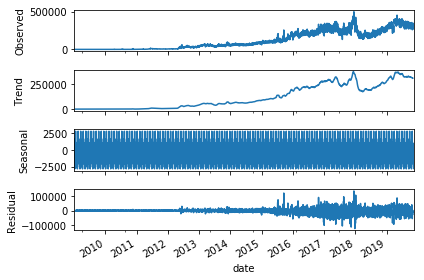

In [10]:
# first, this is what we find if we guess that the frequency would be monthly
result = seasonal_decompose(tx_cnt_df['TxCnt'], model='additive', freq = 30)
#print(result.trend)
#print(result.seasonal)
#print(result.resid)
#print(result.observed)
result.plot()
plt.show()

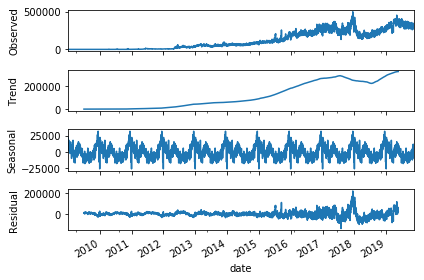

In [11]:
# then, this is what we find if we guess that the frequency would be annual
result = seasonal_decompose(tx_cnt_df['TxCnt'], model='additive', freq = 365)
#print(result.trend)
#print(result.seasonal)
#print(result.resid)
#print(result.observed)
result.plot()
plt.show()

Here, we see the difference between the fit with the assumption that the frequency would be monthly, and annual frequency.

For some other time series, we could try a multiplicative model:

$ y(t) = Level * Trend * Seasonality * Noise$

but for this time series, which starts with 0s, it wouldn't be the appropriate model.

# 3. What transformations to use to transform a metric from level-space to growth-space?

In the previous question, we looked at how do values change over a certain period of time.

For the simplified growth metric introduced in question 1, we can calculate growth rate:

In [12]:
btc_growth_df = btc_df[['date', 'Gross_Product']]

# we need to remove February 29th again

btc_growth_df = btc_growth_df[btc_growth_df['date'] != dt.date(year=2016,month=2,day=29)]
btc_growth_df = btc_growth_df[btc_growth_df['date'] != dt.date(year=2012,month=2,day=29)]
btc_growth_df = btc_growth_df[btc_growth_df['date'] != dt.date(year=2008,month=2,day=29)]
btc_growth_df.index = btc_growth_df['date']

btc_growth_df.describe()

-c:5: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
-c:6: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
-c:7: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.


,Gross_Product
count,3.408000e+03
mean,3.555772e+10
std,5.928516e+10
min,1.776703e+05
25%,1.287247e+08
50%,5.765713e+09
75%,4.442395e+10
max,3.288883e+11


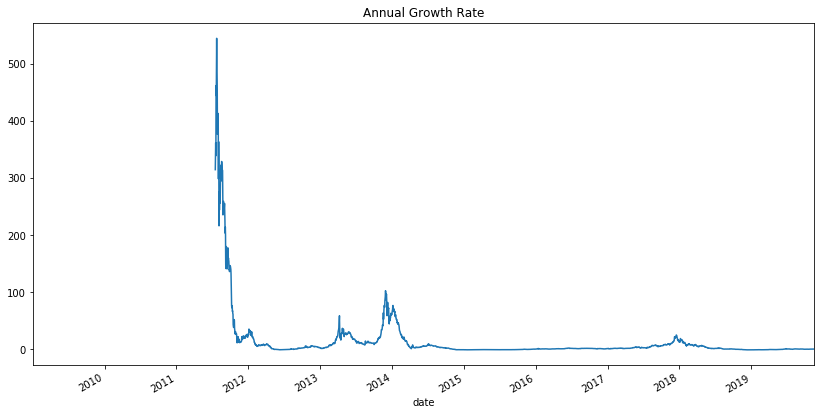

In [13]:
btc_growth_df['Percent'] = btc_growth_df['Gross_Product'].pct_change(periods=365)


btc_growth_df['Percent'].plot(figsize=(14,7), title = 'Annual Growth Rate')
plt.show()

One limitation of this metric is that because some of the metrics that are used for its calculation were not available until early 2010, it can't be calculated until early 2011.

# 4. Is there a method for calculating growth suitable for both positive and negative growth numbers?

From the analysis above, we do see that the fastest annual growth in the Bitcoin network was happening between 2010 and 2013.

The growth between 2013 and 2014 was also fast (compared to typical growth in countries' GDPs).

Otherwise, except for a peak in early 2018, with the Growth metric above, the annual growth of the Bitcoin economy is not that high (although it's still not quite the same as first-world economies, because their growth rate is more stable).

This plot also shows us that there are times when the value of the capital available in the bitcoin network (in USD) is slightly lower than it was one year ago. 